In [2]:
# import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import csv file
df = pd.read_csv('pokemon.csv')

In [3]:
# basic examination of the data
df.head()
# method head() by default shows us the first 5 data in our dataset 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.tail()
# used to get the last n rows. This function returns last n rows from the object based on position.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
df.info()
# used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index 
# dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.describe()
# used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric 
# values.

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


**Exploring Your Dataset**

In [8]:
# value_counts() used to get a Series containing counts of unique values, in this case "Name"
df["Name"].value_counts()

Vaporeon                   1
Durant                     1
Gastly                     1
LatiosMega Latios          1
ManectricMega Manectric    1
                          ..
Metang                     1
Wooper                     1
Nidoran♂                   1
Drilbur                    1
MewtwoMega Mewtwo X        1
Name: Name, Length: 800, dtype: int64

In [9]:
# value_counts() used to get a Series containing counts of unique values, in this case "Type 1"
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

**Cleaning**

In [10]:
# Check and get a good sense of how many null values the dataset has, according to the result, there is only one 
# column with no values which is the type two There is almost 50% null values.

# df.isna().sum()
df.isnull().sum(axis=0)
# df[df.'Type 2'.isna()]

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [11]:
# add fillna to handle missing values
df['Type 2'].fillna(df['Type 2'].mode()[0],inplace=True)
# data['Native Country'].fillna(data['Native Country'].mode()[0], inplace=True)

In [12]:
# Re-checking if the dataframe has missing values
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

**Manipulating DataFrame columns**

In [13]:
# Turn the Legendary column into ones and zeros instead of True / False
df['Legendary'] = df['Legendary'].astype(int)

In [14]:
# Sorting values by name (Aplhabetical)
df.sort_values('Name', ascending=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,0
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,0
68,63,Abra,Psychic,Flying,310,25,20,15,105,55,90,1,0
392,359,Absol,Dark,Flying,465,65,130,60,75,60,75,3,0
393,359,AbsolMega Absol,Dark,Flying,565,65,150,60,115,60,115,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,571,Zoroark,Dark,Flying,510,60,105,60,120,60,105,5,0
631,570,Zorua,Dark,Flying,330,40,65,40,80,40,65,5,0
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,0
695,634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,0


In [15]:
# Delete the pokedex index column
df.drop(df.columns[[0]], axis=1, inplace=True)

In [16]:
# Add the stats together and create 'Total' value, which give us the insight about the strongest Pokemon

df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
# df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.sort_values('Total', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,1
164,MewtwoMega Mewtwo Y,Psychic,Flying,780,106,150,70,194,120,140,1,1
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
422,KyogrePrimal Kyogre,Water,Flying,770,100,150,90,180,160,90,3,1
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,Bug,Flying,195,45,30,35,20,20,45,1,0
288,Wurmple,Bug,Flying,195,45,45,35,20,30,20,3,0
446,Kricketot,Bug,Flying,194,37,25,41,25,41,25,4,0
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,0


**Querying the DataFrame**

In [17]:
# Shows the ammount of Pokemons with HP Larger than 150
df.query('HP > 150')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,Flying,450,250,5,5,35,105,50,1,0
155,Snorlax,Normal,Flying,540,160,110,65,65,110,30,1,0
217,Wobbuffet,Psychic,Flying,405,190,33,58,33,58,33,2,0
261,Blissey,Normal,Flying,540,255,10,10,75,135,55,2,0
351,Wailord,Water,Flying,500,170,90,45,90,45,60,3,0
655,Alomomola,Water,Flying,470,165,75,80,40,45,65,5,0


In [18]:
# Shows the ammount of Pokemons with Defense Larger than 150
df.query('Defense > 150')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
87,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,0
98,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,0
103,Onix,Rock,Ground,385,35,45,160,30,45,70,1,0
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,0
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,0
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,0
332,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,0
333,AggronMega Aggron,Steel,Flying,630,70,140,230,60,80,50,3,0
414,Regirock,Rock,Flying,580,80,100,200,50,100,50,3,1
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,1


In [19]:
# Shows the ammount of Pokemons with Speed Larger than 150
df.query('Speed > 150')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,0
431,DeoxysSpeed Forme,Psychic,Flying,600,50,95,90,95,90,180,3,1


In [20]:
# Shows the ammount of Legendaries based on the Generation
df.groupby(['Generation'])['Legendary'].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Legendary, dtype: int64

In [21]:
# Shows the ammount of Type 1 Legendary Pokemon
df.groupby(['Type 1'])['Legendary'].count()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Legendary, dtype: int64

In [22]:
# Shows the ammount of Type 2 Legendary Pokemon
df.groupby(['Type 2'])['Legendary'].count()

Type 2
Bug           3
Dark         20
Dragon       18
Electric      6
Fairy        23
Fighting     26
Fire         12
Flying      483
Ghost        14
Grass        25
Ground       35
Ice          14
Normal        4
Poison       34
Psychic      33
Rock         14
Steel        22
Water        14
Name: Legendary, dtype: int64

**Visualization using Matplotlib**

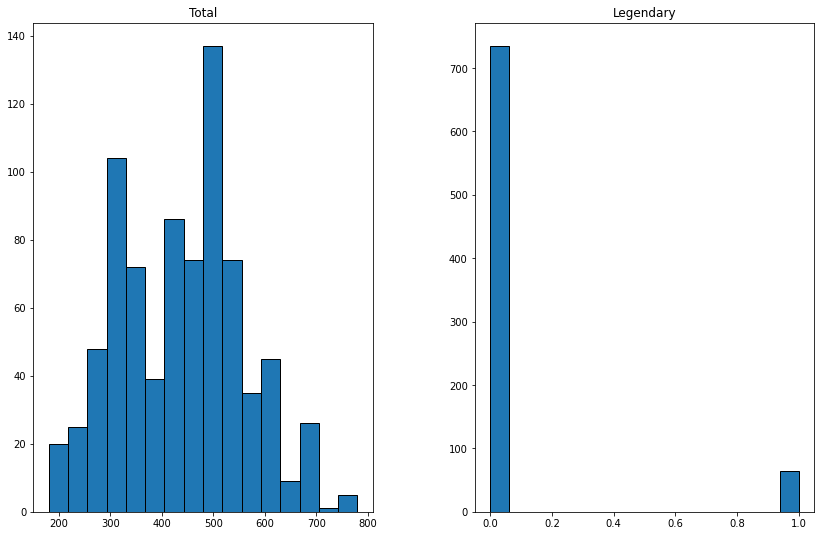

In [23]:
# Matplotlib is a 2-D plotting library that helps in visualizing figures. 
# Matplotlib emulates Matlab like graphs and visualizations.  We use histogram.
# A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension.

df[['Total','Legendary']].hist(figsize=(14,9),bins=16,linewidth='1',edgecolor='k',grid=False)
plt.show()